In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [4]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()


In [5]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape


((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [6]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]


9

In [8]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]


In [9]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

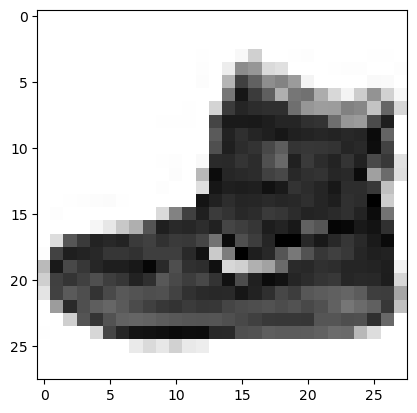

In [10]:
plt.imshow(X_train[0],cmap='Greys')


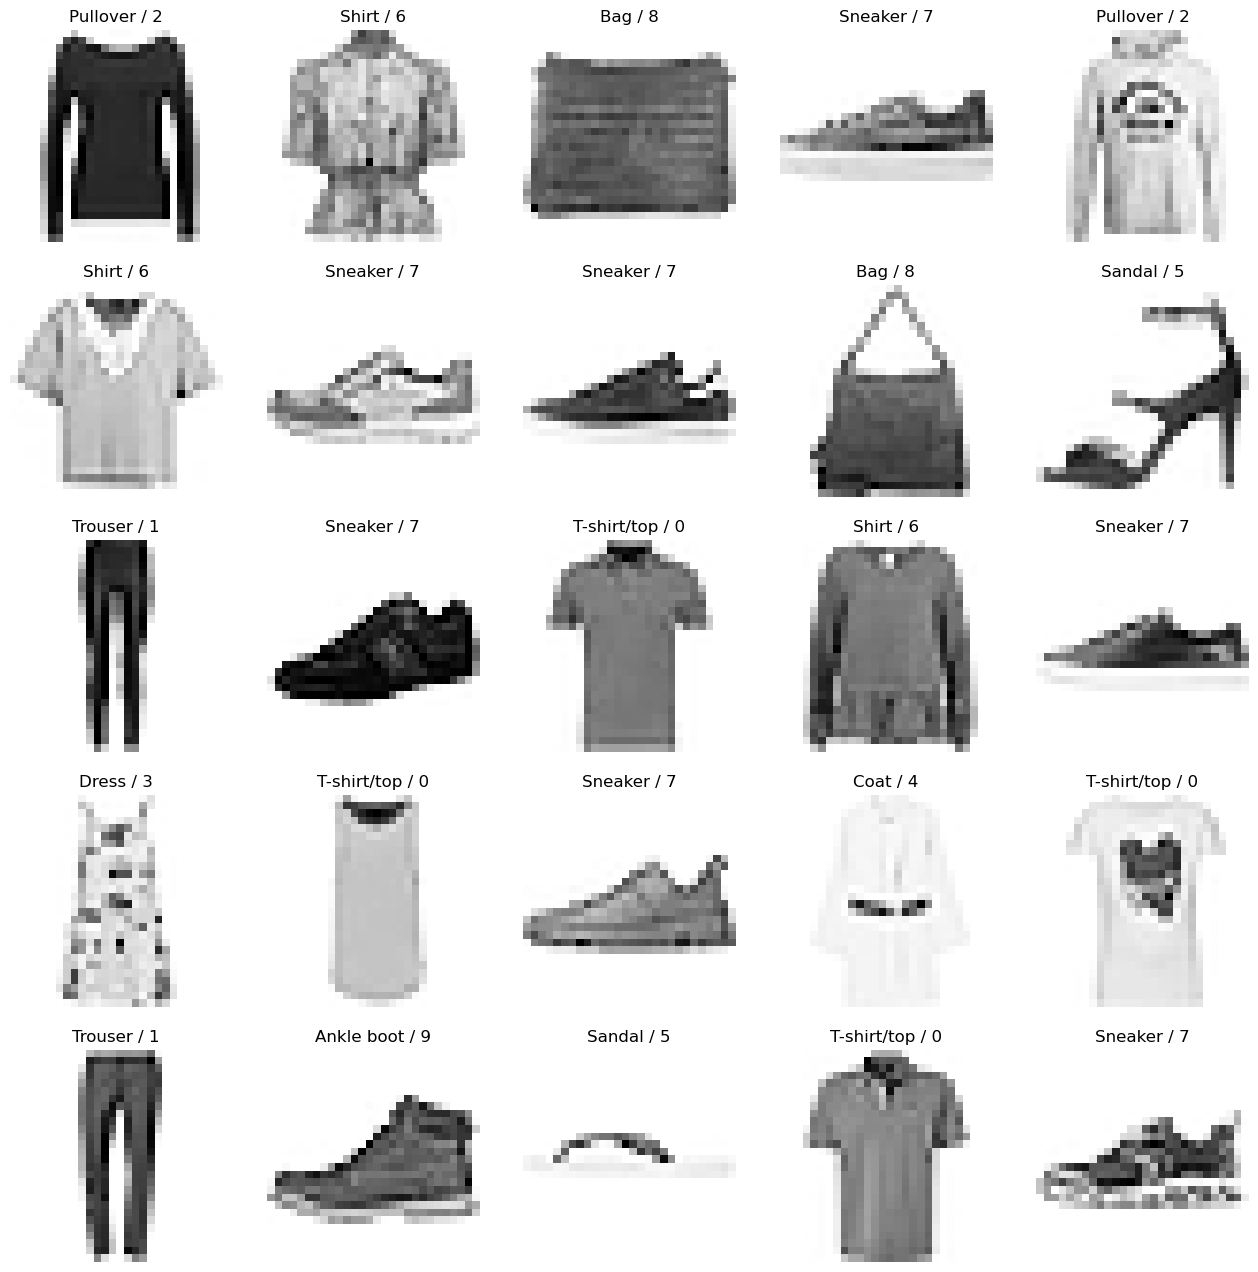

In [11]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.ndim


3

In [13]:
X_train = np.expand_dims(X_train,-1)


In [14]:
X_train.ndim


4

In [15]:
X_test=np.expand_dims(X_test,-1)


In [16]:
X_train = X_train/255
X_test= X_test/255

In [17]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)


In [18]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [19]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [21]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))


Epoch 1/10
94/94 [==============================] - 3s 33ms/step - loss: 0.6482 - accuracy: 0.7785 - val_loss: 0.4472 - val_accuracy: 0.8381
Epoch 2/10
94/94 [==============================] - 3s 33ms/step - loss: 0.3775 - accuracy: 0.8676 - val_loss: 0.3738 - val_accuracy: 0.8691
Epoch 3/10
94/94 [==============================] - 3s 32ms/step - loss: 0.3238 - accuracy: 0.8861 - val_loss: 0.3250 - val_accuracy: 0.8865
Epoch 4/10
94/94 [==============================] - 3s 33ms/step - loss: 0.2927 - accuracy: 0.8962 - val_loss: 0.3097 - val_accuracy: 0.8899
Epoch 5/10
94/94 [==============================] - 3s 34ms/step - loss: 0.2685 - accuracy: 0.9043 - val_loss: 0.3002 - val_accuracy: 0.8932
Epoch 6/10
94/94 [==============================] - 3s 33ms/step - loss: 0.2495 - accuracy: 0.9100 - val_loss: 0.2890 - val_accuracy: 0.8997
Epoch 7/10
94/94 [==============================] - 3s 32ms/step - loss: 0.2332 - accuracy: 0.9159 - val_loss: 0.2711 - val_accuracy: 0.9064
Epoch 8/10
94

In [22]:
y_pred = model.predict(X_test)
y_pred.round(2)


313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.1 , 0.04, 0.  ]], dtype=float32)

In [23]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.9022


[0.27247053384780884, 0.9021999835968018]

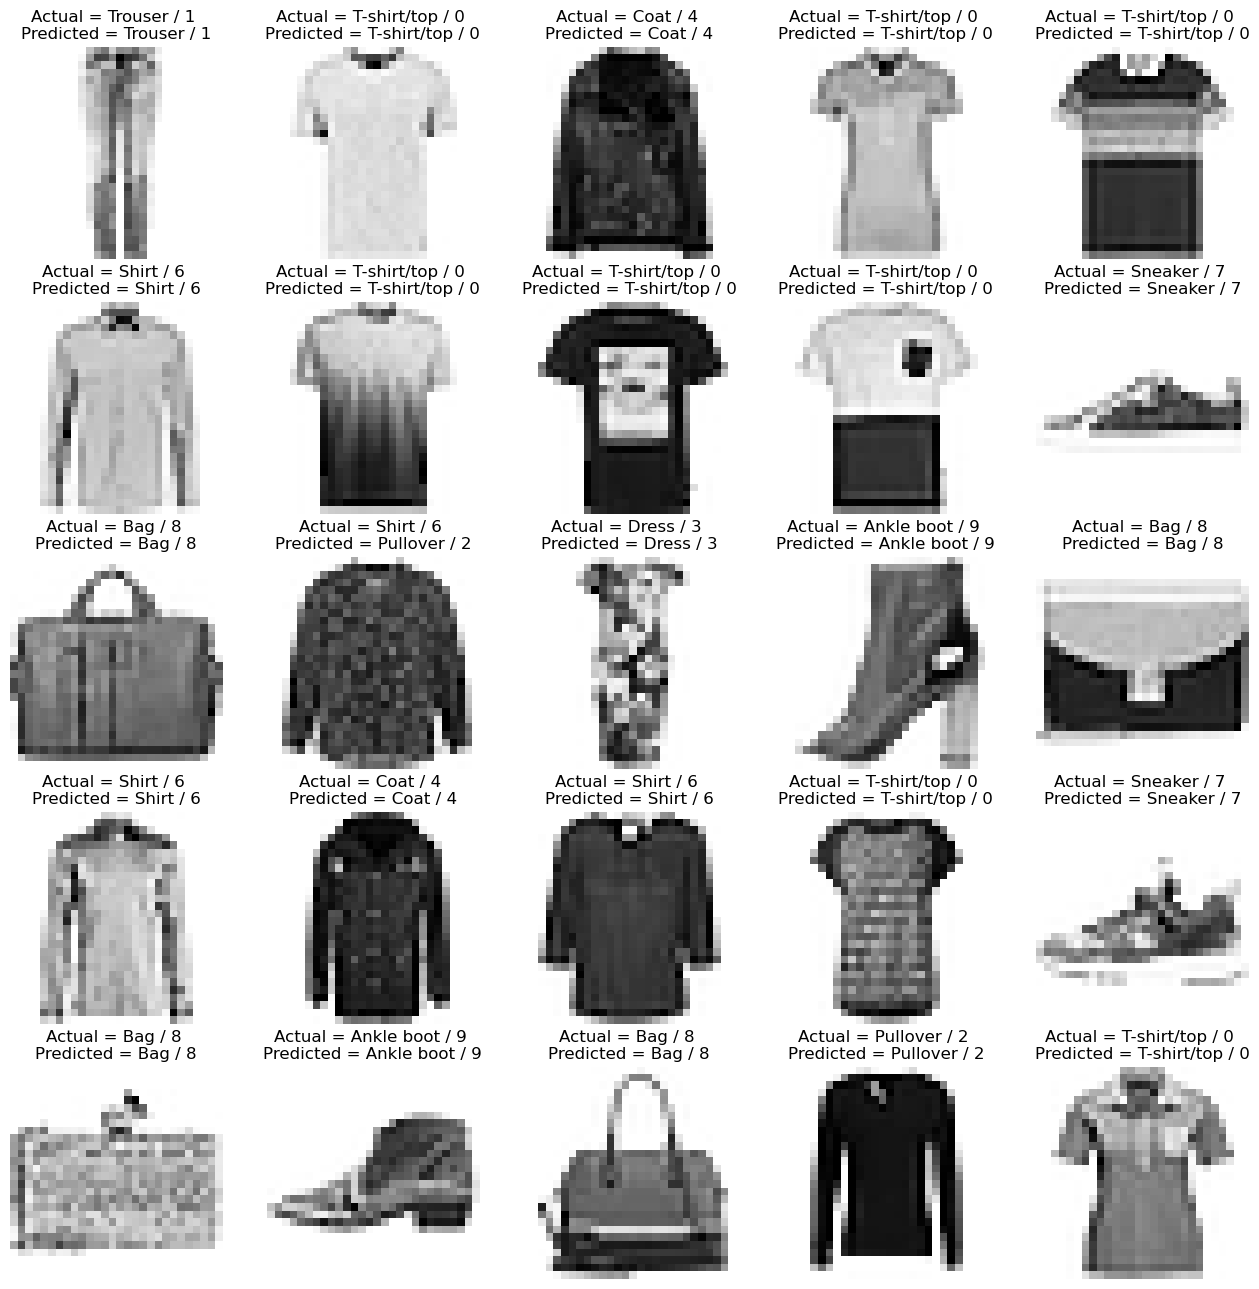

In [25]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


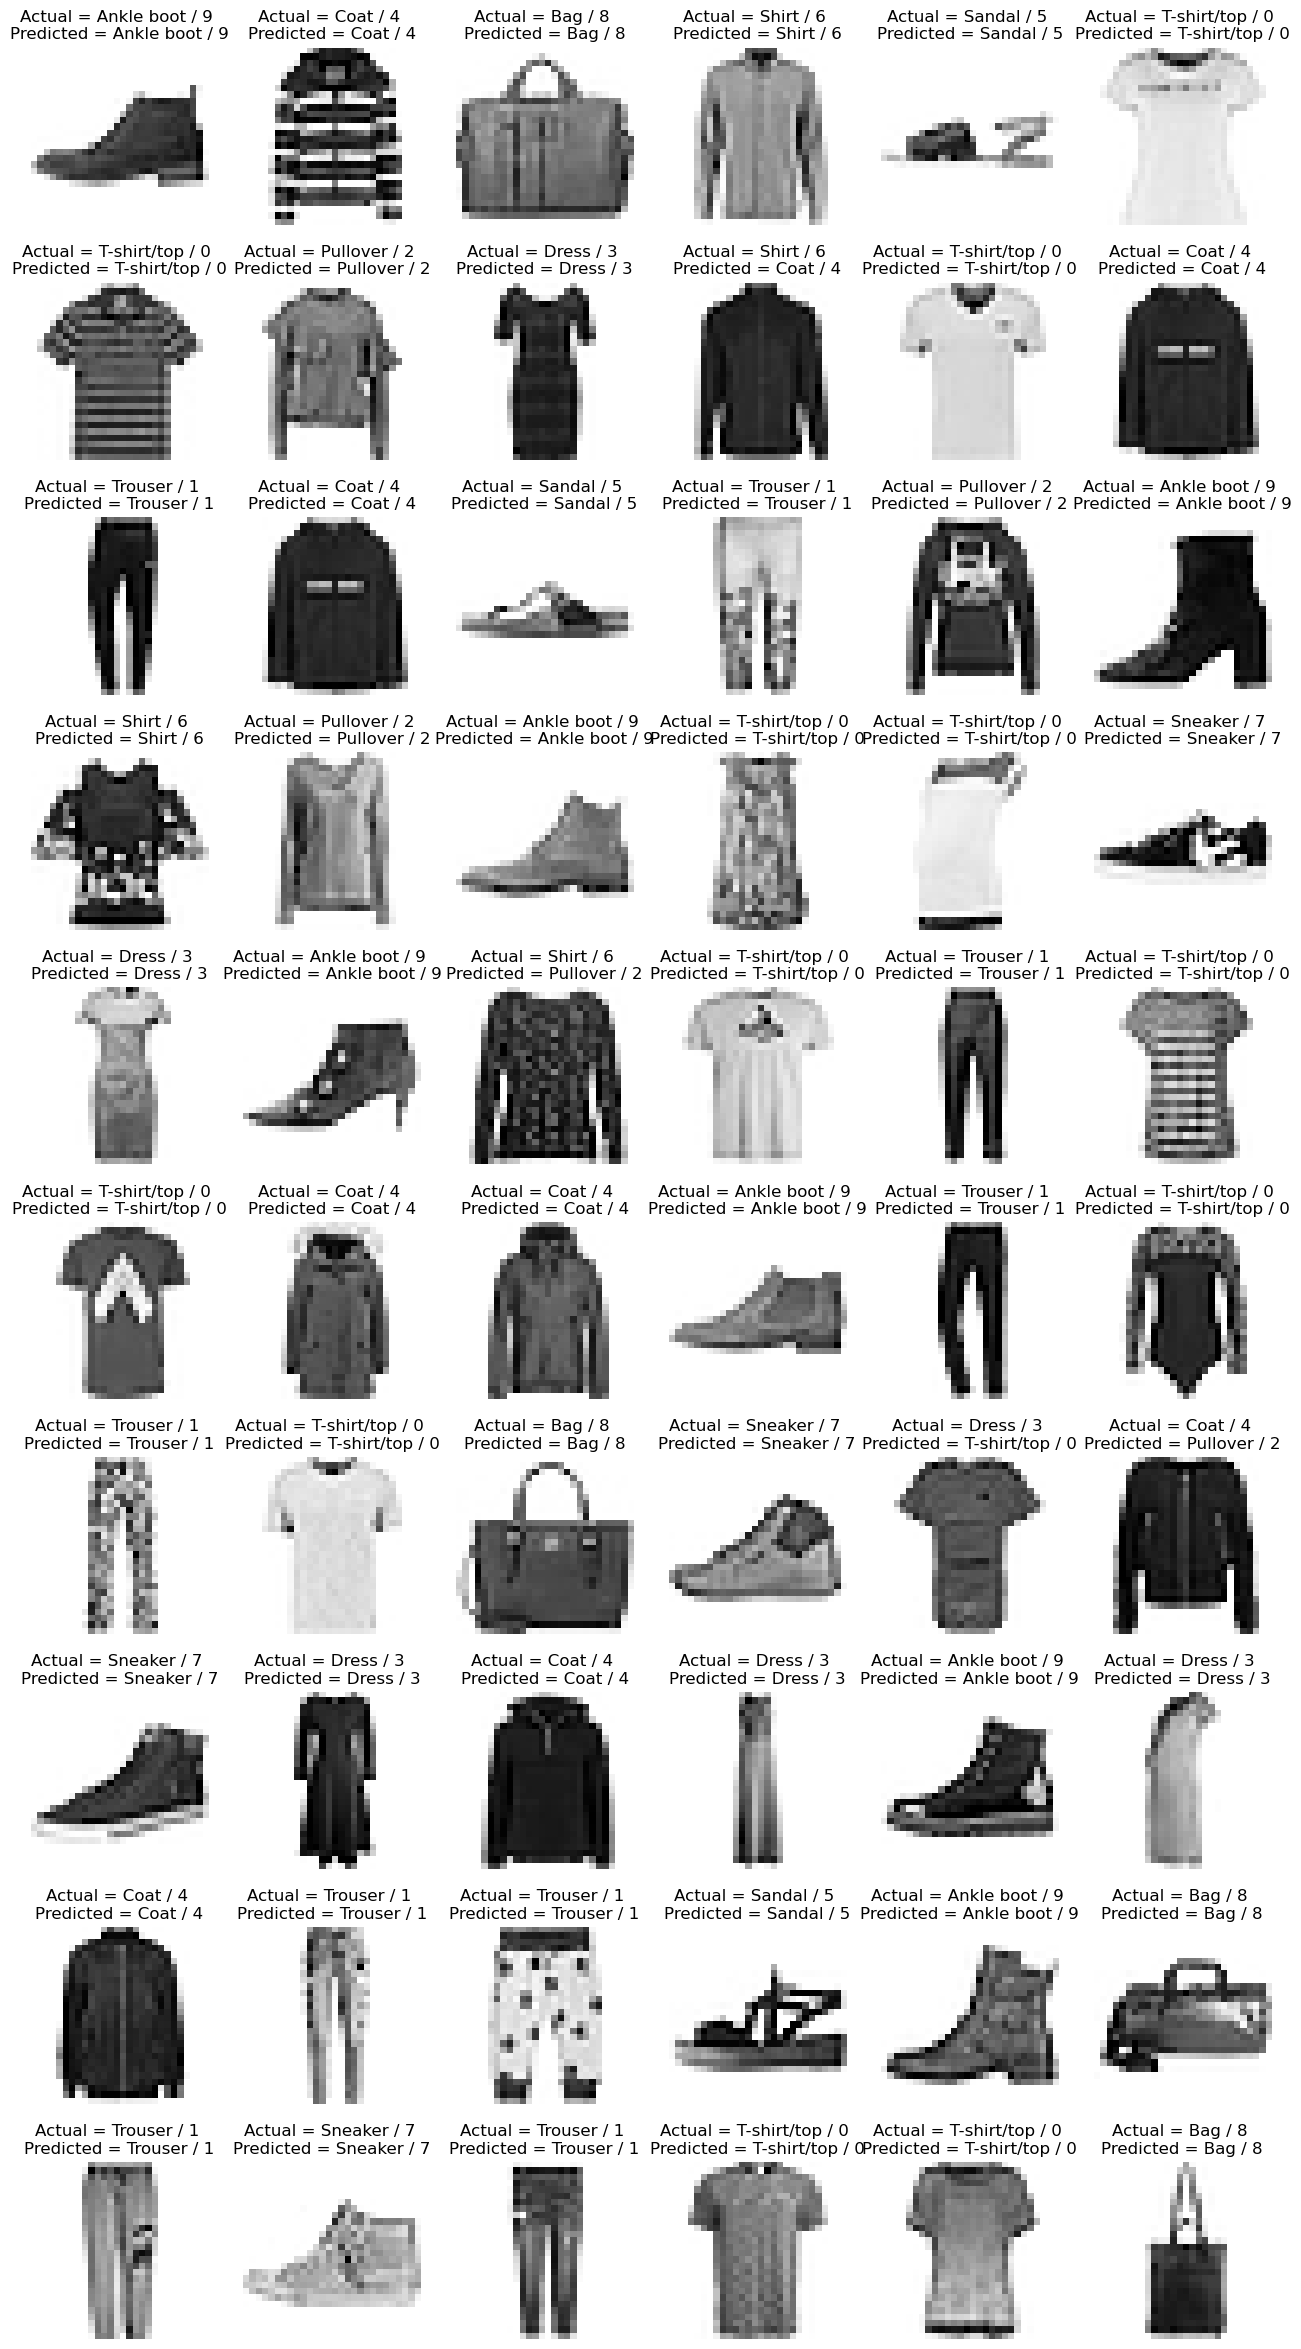

In [26]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)


<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.91      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.82      0.85      0.84      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.80      0.90      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.82      0.61      0.70      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



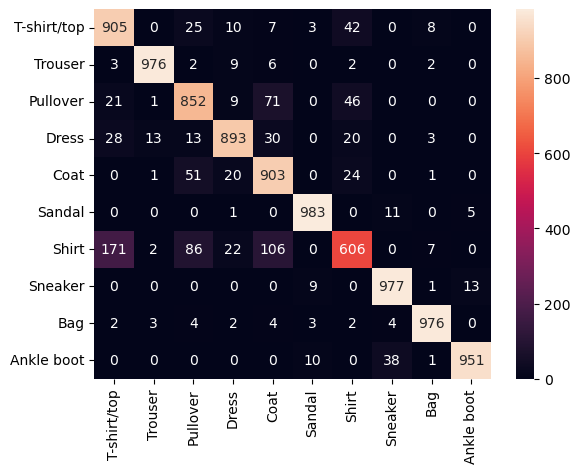

In [28]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)
     


In [30]:
model.save('fashion_mnist_cnn_model.h5')


In [32]:

cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 4s 41ms/step - loss: 1.0341 - accuracy: 0.6138 - val_loss: 0.5861 - val_accuracy: 0.7676
Epoch 2/20
94/94 [==============================] - 4s 43ms/step - loss: 0.5668 - accuracy: 0.7847 - val_loss: 0.4741 - val_accuracy: 0.8237
Epoch 3/20
94/94 [==============================] - 4s 42ms/step - loss: 0.4767 - accuracy: 0.8223 - val_loss: 0.4134 - val_accuracy: 0.8462
Epoch 4/20
94/94 [==============================] - 4s 42ms/step - loss: 0.4155 - accuracy: 0.8456 - val_loss: 0.3869 - val_accuracy: 0.8543
Epoch 5/20
94/94 [==============================] - 4s 44ms/step - loss: 0.3883 - accuracy: 0.8575 - val_loss: 0.3640 - val_accuracy: 0.8634
Epoch 6/20
94/94 [==============================] - 4s 47ms/step - loss: 0.3607 - accuracy: 0.8661 - val_loss: 0.3392 - val_accuracy: 0.8736
Epoch 7/20
94/94 [==============================] - 4s 43ms/step - loss: 0.3367 - accuracy: 0.8769 - val_loss: 0.3261 - val_accuracy: 0.8758
Epoch 8/20
94

[0.5024176239967346, 0.9018999934196472]